# (0) Business Understanding


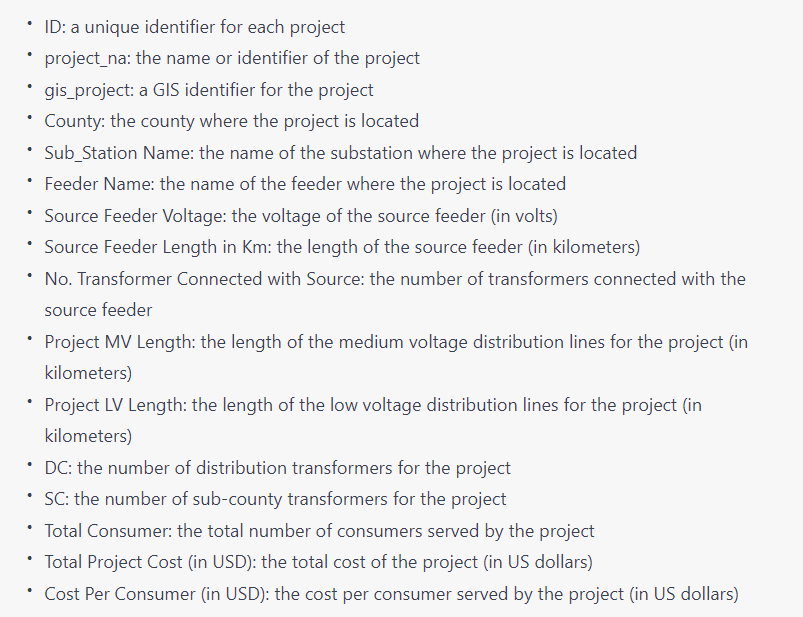

# (1) Data Understanding/Data Preparation


In [212]:
import pandas as pd

# read an Excel file and load it into a DataFrame
df = pd.read_excel('Filev2.xlsx')

# print the first few rows of the DataFrame

df.head()



,ID,project _na,gis_projec,County,Sub_Station Name,Feeder Name,Source Feeder Voltage,Source Feeder Length in Km,No. Transformer Connected with Source,Project MV Length,Project LV Length,DC,SC,Total Consumer,Total Cost,Cost Per Consumer
0,340,KIN-KIT-UKASI_MBUVU_IKIME_KAVUTI_KAVAANI_MITAM...,340,Kitui,KINDARUMA SUBSTATION,KITUI EX KINDARUMA,33000,1843,819.0,351.150,249.0,3632,368,4,7716635,1929
1,60,NYA-NYA-MURUKU,60,Laikipia,NYAHURURU 33/11 SUBSTATION,NYAHURURU 11K V EX NYAHURU,11000,473,336.0,32.177,34.5,1092,108,12,1517596,1265
2,175,MWA-LOI-ENTARARA,175,Kajiado,MWATATE 33/11KV SUBSTATION,LOITOKTOK 33KV EX MWATATE,33000,434,229.0,1.583,1.0,11,1,12,31835,2653
3,436,NAI-DCK-NTURUMETI-S,436,Narok,NAIVASHA SUBSTATION,DCK NAROK 33KV EX SUSWA,33000,1159,416.0,1.313,1.0,13,1,14,29871,2134
4,475,KAM-KYE-NTHAMBU-KAMARANDI-IRIAITUNE,475,Embu,KAMBURU 132 KV SUBSTATION,KYENI / KANYAKINE 33kV,33000,785,428.0,60.654,51.0,1638,162,18,1631283,906


In [214]:
df.dtypes

ID                                         int64
project _na                               object
gis_projec                                 int64
County                                    object
Sub_Station Name                          object
Feeder Name                               object
Source Feeder Voltage                      int64
Source Feeder Length in Km                 int64
No. Transformer Connected with Source    float64
Project MV Length                        float64
Project LV Length                        float64
DC                                         int64
SC                                         int64
Total Consumer                             int64
Total Cost                                 int64
 Cost Per Consumer                         int64
dtype: object

In [215]:
df.shape

(393, 16)

In [216]:
df.describe()

,ID,gis_projec,Source Feeder Voltage,Source Feeder Length in Km,No. Transformer Connected with Source,Project MV Length,Project LV Length,DC,SC,Total Consumer,Total Cost,Cost Per Consumer
count,393.000000,393.000000,393.000000,393.000000,392.000000,393.000000,393.000000,393.000000,393.000000,393.000000,3.930000e+02,393.000000
mean,232.208651,241.913486,25137.659033,612.979644,336.948980,24.544308,20.509542,632.676845,62.921120,643.361323,7.537424e+05,1339.267176
std,159.262914,153.456926,10594.540692,503.458807,270.901682,36.207268,28.784940,935.544652,92.739108,1003.532918,1.158306e+06,826.520091
min,1.000000,1.000000,1100.000000,4.000000,8.000000,0.623000,1.000000,11.000000,1.000000,4.000000,1.117000e+03,13.000000
25%,83.000000,99.000000,11000.000000,253.000000,145.500000,6.652000,6.000000,131.000000,13.000000,136.000000,1.761760e+05,823.000000
50%,216.000000,255.000000,33000.000000,447.000000,222.000000,12.319000,11.000000,279.000000,27.000000,272.000000,3.636880e+05,1179.000000
75%,373.000000,373.000000,33000.000000,785.000000,454.000000,27.151000,23.000000,696.000000,70.000000,682.000000,8.452690e+05,1569.000000
max,501.000000,501.000000,33000.000000,1843.000000,1063.000000,351.150000,249.000000,7004.000000,691.000000,7695.000000,9.938862e+06,6319.000000


In [217]:
df.isnull().sum()

ID                                       0
project _na                              0
gis_projec                               0
County                                   0
Sub_Station Name                         0
Feeder Name                              0
Source Feeder Voltage                    0
Source Feeder Length in Km               0
No. Transformer Connected with Source    1
Project MV Length                        0
Project LV Length                        0
DC                                       0
SC                                       0
Total Consumer                           0
Total Cost                               0
 Cost Per Consumer                       0
dtype: int64

In [218]:
df["No. Transformer Connected with Source"].fillna(value=0, inplace=True)

# (2) Data Exploration


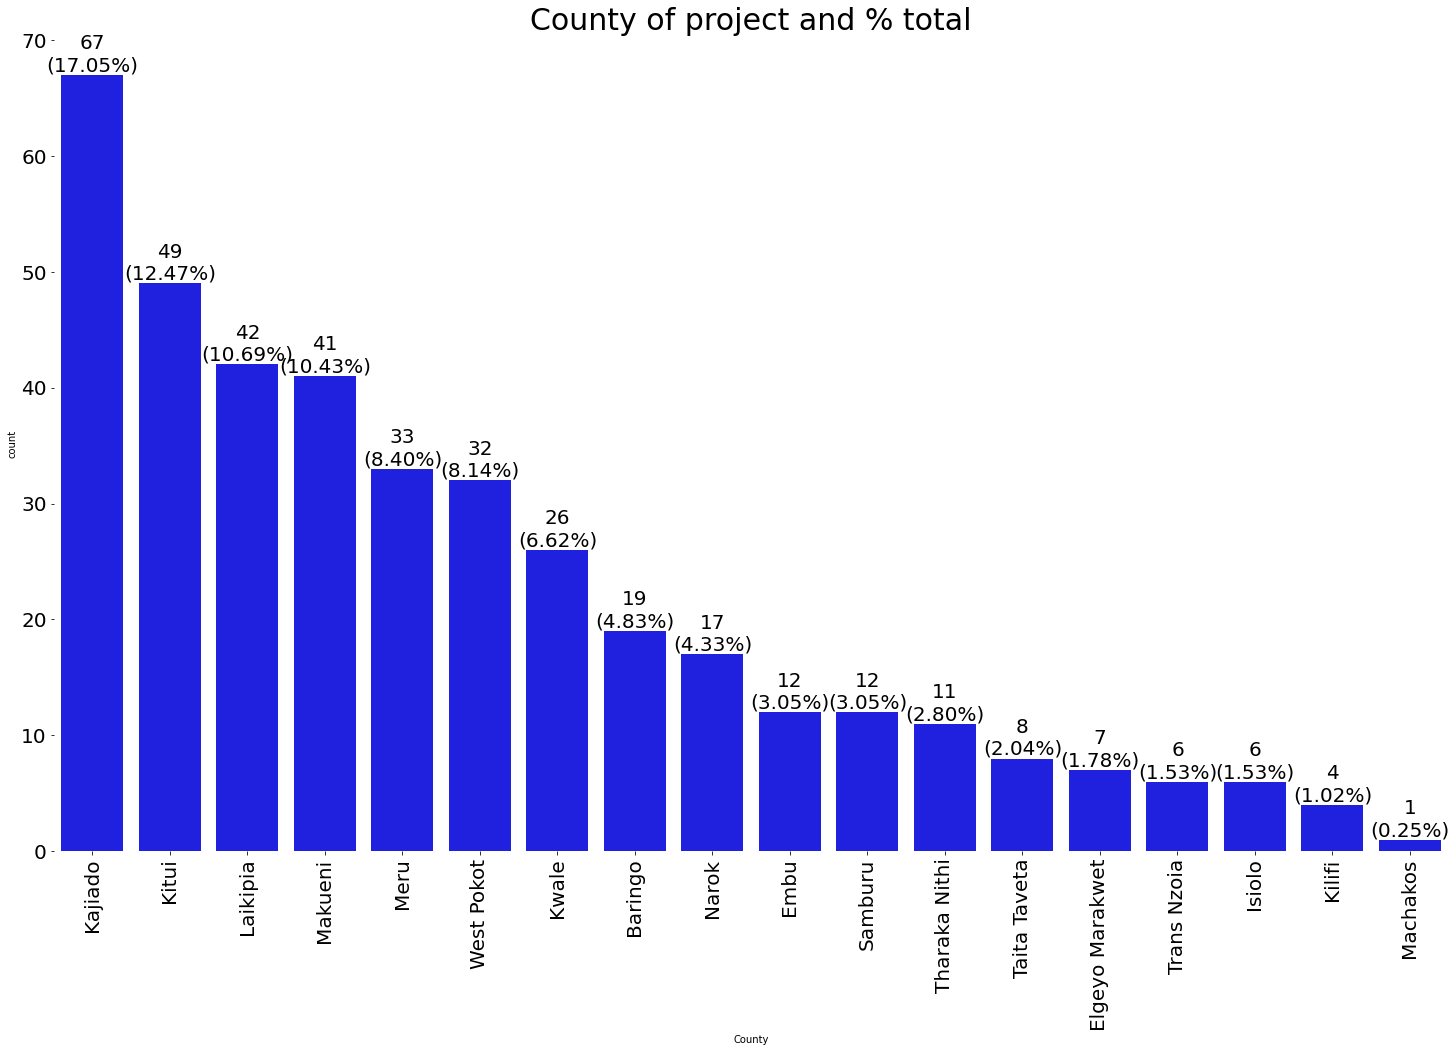

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

#get count to each County

state_counts=df["County"].value_counts()

total=len(df)

#create the count plot

ax = sns.countplot(x="County", data=df, order=state_counts.index, color="blue" )

#add title

plt.title("County of project and % total",fontsize=30)
#plt.xlabel("County", fontsize=30)

#rotate labels

plt.xticks(rotation=90)

# Set the tick label fontsize
ax.tick_params(axis='both', which='major', labelsize=20)


# add labels with count and percentage of total for each state
for i, state in enumerate(ax.get_xticklabels()):
    count = state_counts[state.get_text()]
    percent = (count/total)*100
    ax.annotate('{}\n({:.2f}%)'.format(count, percent), (i, count), ha='center', va='bottom', fontsize=20)

# remove border line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    
    


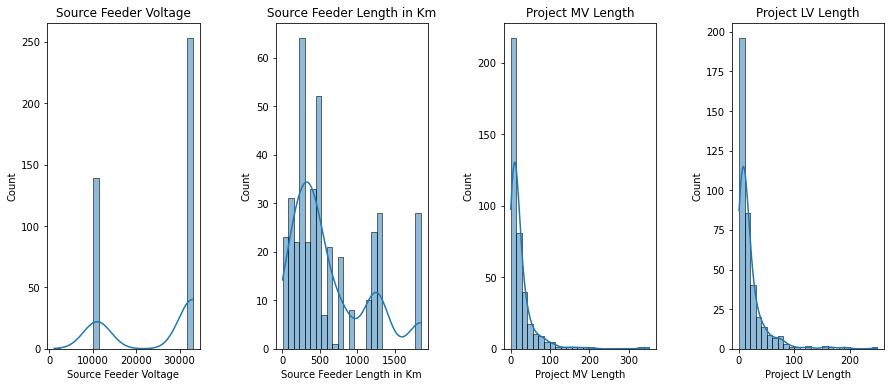

In [269]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['Source Feeder Voltage','Source Feeder Length in Km','Project MV Length','Project LV Length']:
    n += 1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

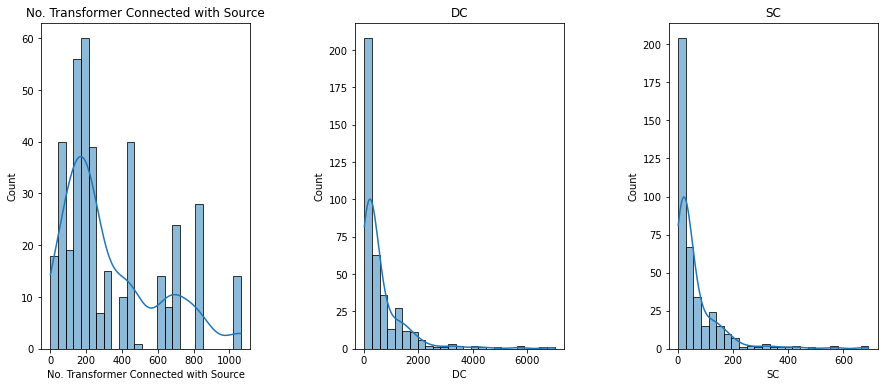

In [271]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['No. Transformer Connected with Source','DC','SC']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

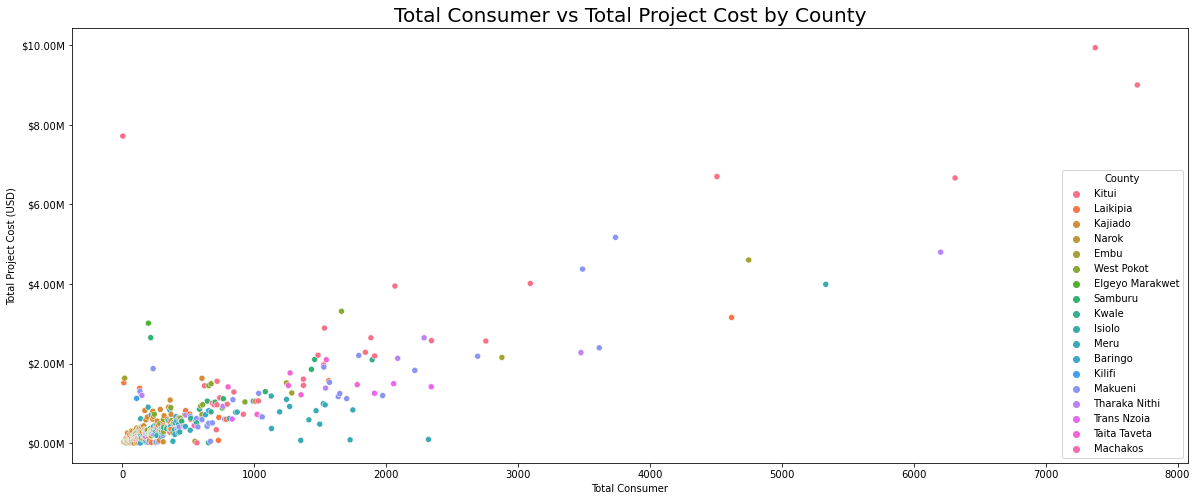

In [221]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(20,8))

# Define a function to format the y-axis tick labels in millions
def millions_formatter(x, pos):
    return f"${x/1000000:.2f}M"

# Create the scatterplot with color by County

sns.scatterplot(data=df, x="Total Consumer", y="Total Cost", hue="County")

# Set the title and labels
plt.title("Total Consumer vs Total Project Cost by County", fontsize=20)
plt.xlabel("Total Consumer")
plt.ylabel("Total Project Cost (USD)")

# Set the y-axis tick formatter to millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add a legend with title
plt.legend(title="County")

# Show the plot
plt.show()


<AxesSubplot:>

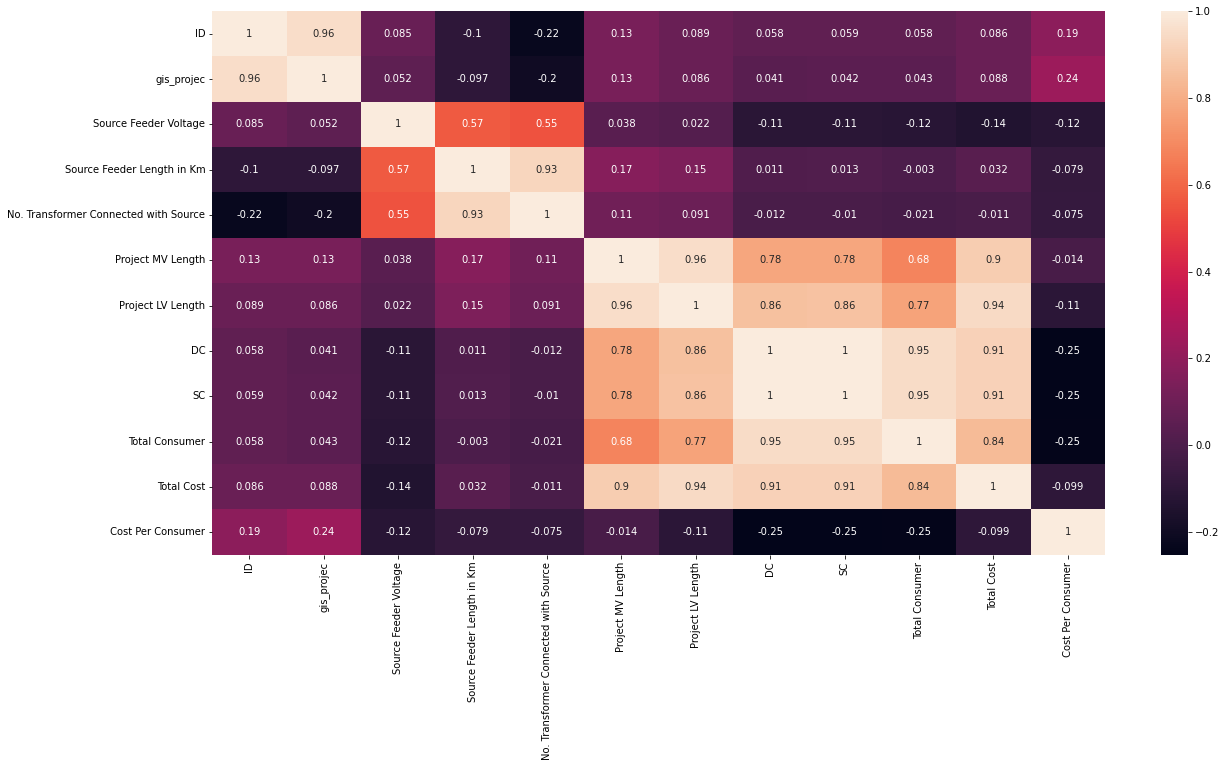

In [274]:
#Checking correlations

correlation = df.corr()

%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)

In [278]:
dep_var = 'Total Cost' 

indep_vars = ['Project MV Length', 'Project LV Length','DC','SC','Total Consumer']

corr_table = correlation.loc[indep_vars, dep_var]
corr_table_abs = corr_table.abs()
corr_table_sorted = corr_table_abs.sort_values(ascending=False)
print(corr_table_sorted)


Project LV Length    0.943221
SC                   0.914886
DC                   0.913572
Project MV Length    0.901938
Total Consumer       0.842285
Name: Total Cost, dtype: float64


# (3) Modelling Decision Tree

In [279]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features for the decision tree
features = ['Project MV Length', 'Project LV Length', 'DC', 'SC', 'Total Consumer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Total Cost'], test_size=0.5, random_state=0)

# Create the decision tree regressor and fit to the training data
dt = DecisionTreeRegressor(max_depth=2, random_state=0)
dt.fit(X_train, y_train)

# Predict on the testing data and calculate the R^2 score and MSE
y_pred = dt.predict(X_test)
r2_score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R^2 Score: 0.6673
Mean Squared Error: 387195582712.6262


# (4) Hyperparameter tuning:

In [232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features for the decision tree
features = ['Source Feeder Length in Km', 'Source Feeder Length in Km', 'Source Feeder Length in Km', 'Project MV Length', 'Project LV Length', 'DC', 'SC', 'Total Consumer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Total Cost'], test_size=0.5, random_state=0)

# Create the decision tree regressor and fit to the training data
dt = DecisionTreeRegressor(max_depth=3, random_state=0)
dt.fit(X_train, y_train)

# Predict on the testing data and calculate the R^2 score and MSE
y_pred = dt.predict(X_test)
r2_score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score: 0.8166
Mean Squared Error: 213447021540.4097


In [233]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features for the decision tree
features = ['Source Feeder Length in Km', 'Source Feeder Length in Km', 'Source Feeder Length in Km', 'Project MV Length', 'Project LV Length', 'DC', 'SC', 'Total Consumer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Total Cost'], test_size=0.5, random_state=0)

# Create the decision tree regressor and fit to the training data
dt = DecisionTreeRegressor(max_depth=5, random_state=0)
dt.fit(X_train, y_train)

# Predict on the testing data and calculate the R^2 score and MSE
y_pred = dt.predict(X_test)
r2_score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score: 0.8477
Mean Squared Error: 177233889321.4257


In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features for the decision tree
features = ['Source Feeder Length in Km', 'Source Feeder Length in Km', 'Source Feeder Length in Km', 'Project MV Length', 'Project LV Length', 'DC', 'SC', 'Total Consumer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Total Cost'], test_size=0.5, random_state=0)

# Create the decision tree regressor and fit to the training data
dt = DecisionTreeRegressor(max_depth=10, random_state=0)
dt.fit(X_train, y_train)

# Predict on the testing data and calculate the R^2 score and MSE
y_pred = dt.predict(X_test)
r2_score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score: 0.8210
Mean Squared Error: 208348332612.5510


In [297]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features for the decision tree
features = ['Project MV Length', 'Project LV Length', 'DC', 'SC', 'Total Consumer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Total Cost'], test_size=0.5, random_state=40)

# Create the decision tree regressor and fit to the training data
dt = DecisionTreeRegressor(max_depth=4, min_samples_split=2, random_state=40)
dt.fit(X_train, y_train)

# Predict on the testing data and calculate the R^2 score and MSE
y_pred = dt.predict(X_test)
r2_score = dt.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score: 0.8368
Mean Squared Error: 155039959829.9308


In [301]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


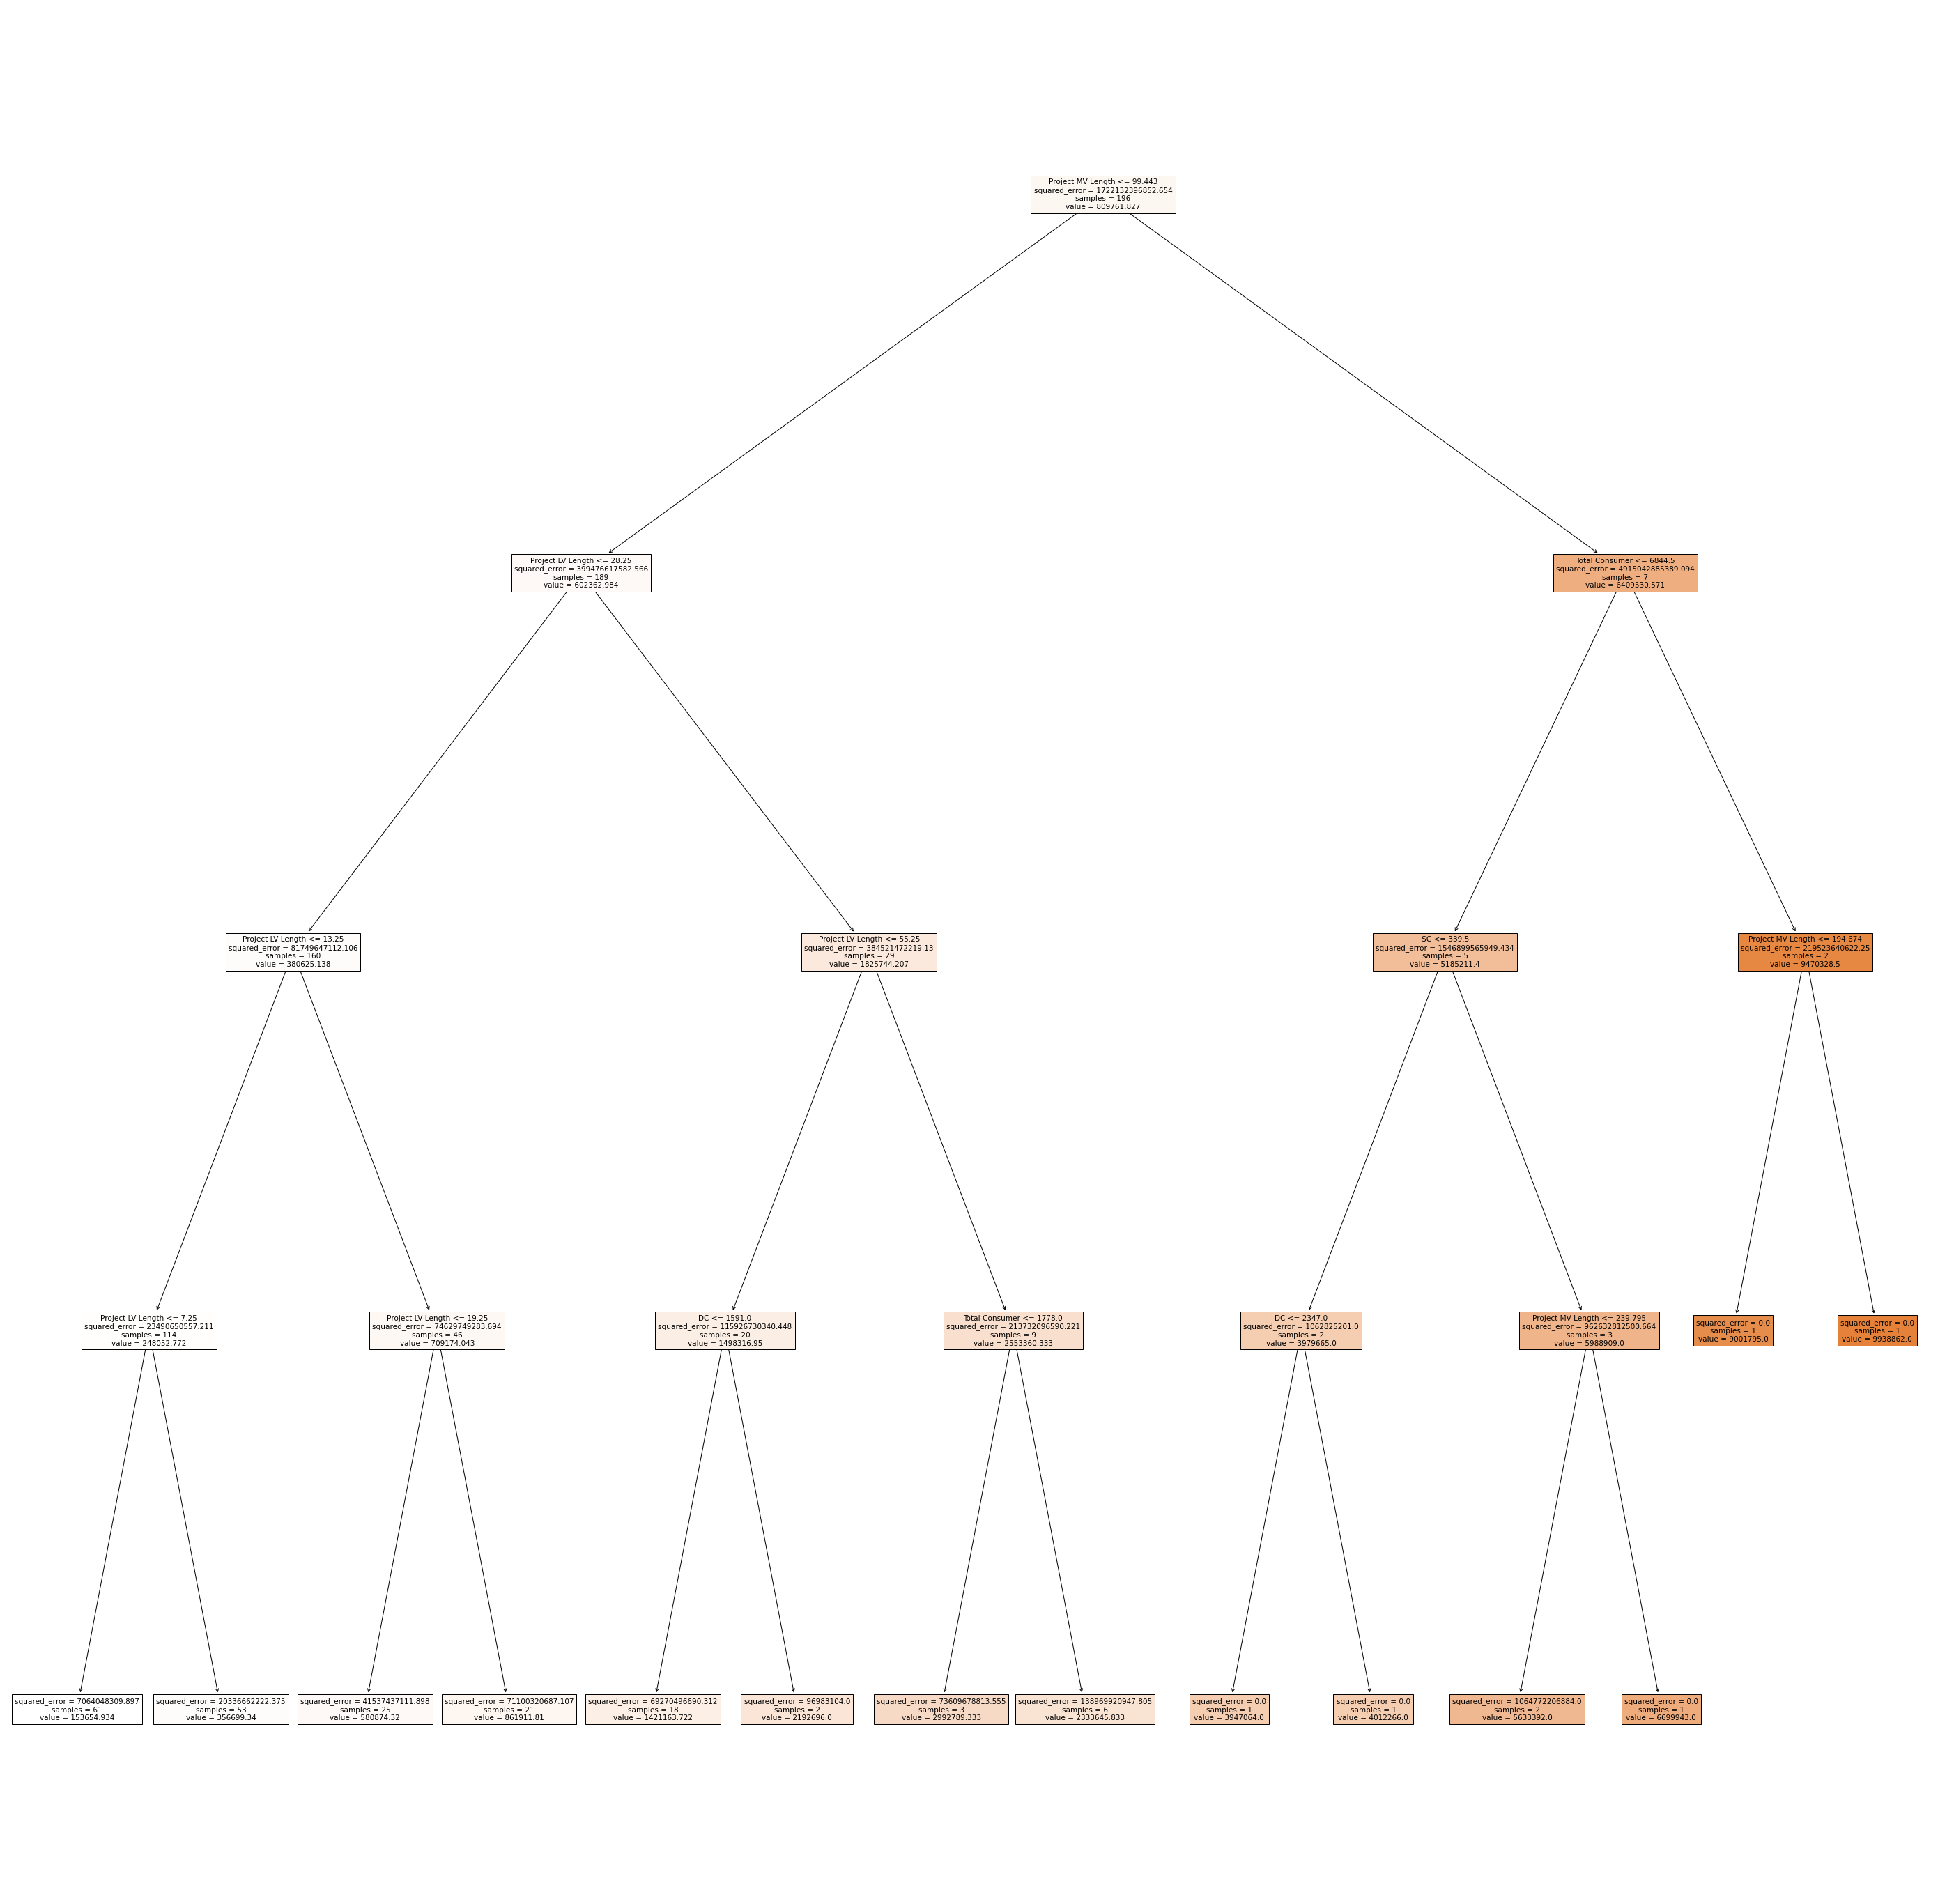

In [306]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(dt, feature_names=features, filled=True)
plt.show()

In [307]:
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=features)
print(tree_rules)


|--- Project MV Length <= 99.44
|   |--- Project LV Length <= 28.25
|   |   |--- Project LV Length <= 13.25
|   |   |   |--- Project LV Length <= 7.25
|   |   |   |   |--- value: [153654.93]
|   |   |   |--- Project LV Length >  7.25
|   |   |   |   |--- value: [356699.34]
|   |   |--- Project LV Length >  13.25
|   |   |   |--- Project LV Length <= 19.25
|   |   |   |   |--- value: [580874.32]
|   |   |   |--- Project LV Length >  19.25
|   |   |   |   |--- value: [861911.81]
|   |--- Project LV Length >  28.25
|   |   |--- Project LV Length <= 55.25
|   |   |   |--- DC <= 1591.00
|   |   |   |   |--- value: [1421163.72]
|   |   |   |--- DC >  1591.00
|   |   |   |   |--- value: [2192696.00]
|   |   |--- Project LV Length >  55.25
|   |   |   |--- Total Consumer <= 1778.00
|   |   |   |   |--- value: [2992789.33]
|   |   |   |--- Total Consumer >  1778.00
|   |   |   |   |--- value: [2333645.83]
|--- Project MV Length >  99.44
|   |--- Total Consumer <= 6844.50
|   |   |--- SC <= 339.